In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys, os
sys.path.append(os.environ['raco'])
sys.path.append(os.environ['rapp'])
sys.path.append(os.environ['rapl'])
from common import *
from plotcommon import *
from cla_util import *
from rayleigh_diagnostics import GridInfo

In [2]:
dirname = '/nobackup/lmatilsk/case_M-Prm4.0/00_1k_iters_nt768_dealiasby2/'
#dirname = '/nobackup/lmatilsk/case_M-Prm4.0/00_1k_iters_nt384_orig/'
#dirname = '/nobackup/lmatilsk/case_M-Prm4.0/00_1k_iters_nt384_dealiasby2/'
#dirname = '/nobackup/lmatilsk/case_M-Prm4.0/00_1k_iters_nt768/'

In [3]:
the_file = get_widest_range_file (dirname + 'data/', 'Point_Probes_trace')
print ('the_file = ', the_file)

the_file =  /nobackup/lmatilsk/case_M-Prm4.0/00_1k_iters_nt768_dealiasby2/data/Point_Probes_trace-24900001_24901000.pkl


In [4]:
# get point probes data
di = get_dict(the_file)
vals = di['vals']

times = di['times']
dt = times[2:] - times[1:-1]
dt = dt.reshape((len(dt), 1, 1, 1))
dt_old = times[1:-1] - times[:-2]
dt_old = dt_old.reshape((len(dt_old), 1, 1, 1))

iters = di['iters']
lut = di['lut']
rvals = di['rvals']
thetavals = di['thetavals']
phivals = di['phivals']

# get grid info
di_grid = get_grid_info(dirname)
rr = di_grid['rr']
tt = di_grid['tt']
phi = di_grid['phi']
tt_lat = di_grid['tt_lat']
lons = di_grid['lons']

irvals = inds_from_vals(rr, rvals)
ithetavals = inds_from_vals(tt, thetavals)
iphivals = inds_from_vals(phi, phivals)

print ('nphi =', di_grid['nphi'])
print ('iphivals = ', iphivals)

print ('ntheta =', di_grid['nt'])
print ('ithetavals = ', ithetavals)

print('nr =', di_grid['nr'])
print ('irvals = ', irvals)

nphi = 1536
iphivals =  [   0  192  384  576  767  959 1151 1343]
ntheta = 768
ithetavals =  [ 38  96 192 288 383 479 575 671 729]
nr = 192
irvals =  [  9  14  21  26  31  37  42  49  54  63  84  98 136 146 154 160 167 175
 181]


In [5]:
print (np.shape(vals[0, ..., 0]))

(8, 9, 19)


In [6]:
# pick a point
#iphi0, it0, ir0 = 4, 5, 11
iphi0, it0, ir0 = 4, 3, 4

In [7]:
prot = compute_Prot(dirname)
t = times/prot

In [8]:
print(np.mean(np.diff(times)))
print(np.std(np.diff(times)))

228.72198867797852
0.0


In [9]:
# thermo state
eq = get_eq(dirname)

In [10]:
def my_maxabs(*args):
    the_shape = np.shape(args[0])
    maxabs = np.zeros(the_shape) - np.inf
    for arg in args:
        maxabs = np.maximum(maxabs, arg)
    return maxabs

In [11]:
# r momentum 
rhov_r = vals[..., lut[201]]

adv_r = -vals[..., lut[1201]]
cor_r = vals[..., lut[1219]]
jxb_r = vals[..., lut[1248]]
fexp_r = adv_r + cor_r + jxb_r

visc_r = vals[..., lut[1228]]
gradp_r = vals[..., lut[1237]]
buoy = vals[..., lut[1216]]
fimp_r = buoy + visc_r + gradp_r

# max abs (to normalize later)
maxabs_r = my_maxabs(np.abs(adv_r), np.abs(cor_r), np.abs(visc_r), np.abs(gradp_r), np.abs(jxb_r))

In [12]:
# theta momentum
rhov_t = vals[..., lut[202]]

adv_t = -vals[..., lut[1202]]
cor_t = vals[..., lut[1220]]
jxb_t = vals[..., lut[1249]]
fexp_t = adv_t + cor_t + jxb_t

visc_t = vals[..., lut[1229]]
gradp_t = vals[..., lut[1238]]
fimp_t = visc_t + gradp_t

maxabs_t = my_maxabs(np.abs(adv_t), np.abs(cor_t), np.abs(visc_t), np.abs(gradp_t), np.abs(jxb_t))

In [13]:
# phi momentum
rhov_p = vals[..., lut[203]]

adv_p = -vals[..., lut[1203]]
cor_p = vals[..., lut[1221]]
jxb_p = vals[..., lut[1250]]
fexp_p = adv_p + cor_p + jxb_p

visc_p = vals[..., lut[1230]]
gradp_p = vals[..., lut[1239]]
fimp_p = visc_p + gradp_p

maxabs_p = my_maxabs(np.abs(adv_p), np.abs(cor_p), np.abs(visc_p), np.abs(gradp_p), np.abs(jxb_p))

In [14]:
# heat equation
#rhot = (eq.rho*eq.T)[irvals]
#rhot = rhot.reshape((1, 1, 1, len(rhot)))
#tdsdr = (eq.T*eq.dsdr)[irvals]
#tdsdr = tdsdr.reshape((1, 1, 1, len(tdsdr)))

inte = vals[..., lut[701]]
dy = inte[2:] - inte[1:-1]
dintedt = dy/dt

adv_heat = -vals[..., lut[1401]]
int_heat = vals[..., lut[1434]]
visc_heat = vals[..., lut[1435]]
joule_heat = vals[..., lut[1436]]
fexp_heat = adv_heat + int_heat + visc_heat + joule_heat

ref_adv_heat = -vals[..., lut[1479]]
cond_heat = vals[..., lut[1421]]
fimp_heat = ref_adv_heat + cond_heat

maxabs_heat = my_maxabs(np.abs(adv_heat), np.abs(int_heat), np.abs(visc_heat),\
                        np.abs(ref_adv_heat), cond_heat, joule_heat)

In [15]:
# get d lhs / dt
dy = rhov_r[2:] - rhov_r[1:-1]
drhovdt_r = dy/dt

dy = rhov_t[2:] - rhov_t[1:-1]
drhovdt_t = dy/dt

dy = rhov_p[2:] - rhov_p[1:-1]
drhovdt_p = dy/dt

In [16]:
# start getting weighted rhs

def get_weighted_rhs(fimp, fexp):
    return 0.5*(fimp[2:] + fimp[1:-1]) + fexp[1:-1] + 0.5*(dt/dt_old)*(fexp[1:-1] - fexp[:-2])

fweighted_r = get_weighted_rhs(fimp_r, fexp_r)
fweighted_t = get_weighted_rhs(fimp_t, fexp_t)
fweighted_p = get_weighted_rhs(fimp_p, fexp_p)
fweighted_heat = get_weighted_rhs(fimp_heat, fexp_heat)

Text(0.5, 1.0, 'momentum (r)')

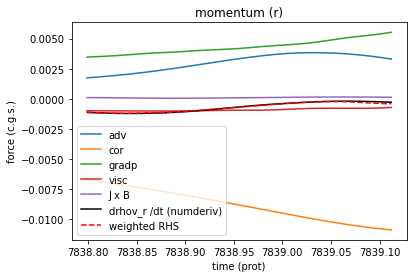

In [17]:
# plot r momentum (all pieces)

# pieces
plt.plot(t, adv_r[:, iphi0, it0, ir0], label='adv')
plt.plot(t, cor_r[:, iphi0, it0, ir0], label='cor')
plt.plot(t, gradp_r[:, iphi0, it0, ir0], label='gradp')
plt.plot(t, visc_r[:, iphi0, it0, ir0], label='visc')
plt.plot(t, jxb_r[:, iphi0, it0, ir0], label='J x B')

# totals
plt.plot(t[2:], drhovdt_r[:, iphi0, it0, ir0], 'k', label='drhov_r /dt (numderiv)')
plt.plot(t[2:], fweighted_r[:, iphi0, it0, ir0], 'r--', label='weighted RHS')

# label
plt.legend()
plt.xlabel('time (prot)')
plt.ylabel('force (c.g.s.)')
plt.title('momentum (r)')

Text(0.5, 1.0, 'momentum totals (r)')

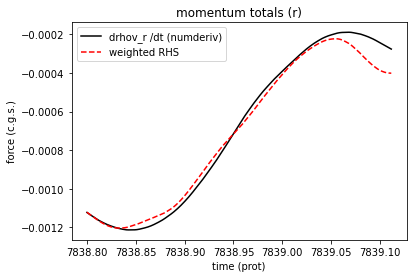

In [18]:
# plot r momentum (totals)
plt.plot(t[2:], drhovdt_r[:, iphi0, it0, ir0], 'k', label='drhov_r /dt (numderiv)')
plt.plot(t[2:], fweighted_r[:, iphi0, it0, ir0], 'r--', label='weighted RHS')

# label
plt.legend()
plt.xlabel('time (prot)')
plt.ylabel('force (c.g.s.)')
plt.title('momentum totals (r)')

Text(0.5, 1.0, 'momentum (t)')

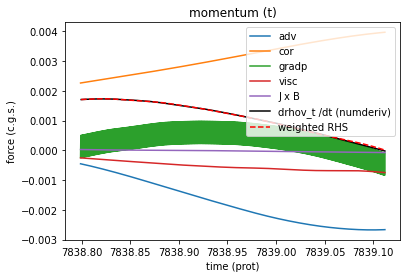

In [19]:
# plot theta momentum (all pieces)

# pieces
plt.plot(t, adv_t[:, iphi0, it0, ir0], label='adv')
plt.plot(t, cor_t[:, iphi0, it0, ir0], label='cor')
plt.plot(t, gradp_t[:, iphi0, it0, ir0], label='gradp')
plt.plot(t, visc_t[:, iphi0, it0, ir0], label='visc')
plt.plot(t, jxb_t[:, iphi0, it0, ir0], label='J x B')

# totals
plt.plot(t[2:], drhovdt_t[:, iphi0, it0, ir0], 'k', label='drhov_t /dt (numderiv)')
plt.plot(t[2:], fweighted_t[:, iphi0, it0, ir0], 'r--', label='weighted RHS')

# label
plt.legend()
plt.xlabel('time (prot)')
plt.ylabel('force (c.g.s.)')
plt.title('momentum (t)')

Text(0.5, 1.0, 'momentum totals (t)')

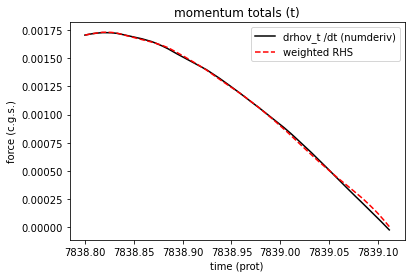

In [20]:
# plot theta momentum (totals)
plt.plot(t[2:], drhovdt_t[:, iphi0, it0, ir0], 'k', label='drhov_t /dt (numderiv)')
plt.plot(t[2:], fweighted_t[:, iphi0, it0, ir0], 'r--', label='weighted RHS')

# label
plt.legend()
plt.xlabel('time (prot)')
plt.ylabel('force (c.g.s.)')
plt.title('momentum totals (t)')

Text(0.5, 1.0, 'momentum (p)')

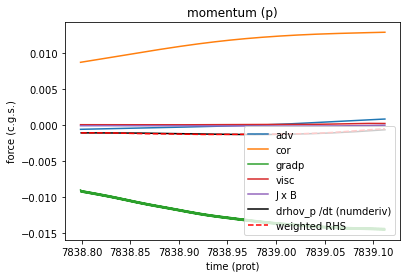

In [21]:
# plot phi momentum (all pieces)

# pieces
plt.plot(t, adv_p[:, iphi0, it0, ir0], label='adv')
plt.plot(t, cor_p[:, iphi0, it0, ir0], label='cor')
plt.plot(t, gradp_p[:, iphi0, it0, ir0], label='gradp')
plt.plot(t, visc_p[:, iphi0, it0, ir0], label='visc')
plt.plot(t, jxb_p[:, iphi0, it0, ir0], label='J x B')

# totals
plt.plot(t[2:], drhovdt_p[:, iphi0, it0, ir0], 'k', label='drhov_p /dt (numderiv)')
plt.plot(t[2:], fweighted_p[:, iphi0, it0, ir0], 'r--', label='weighted RHS')

# label
plt.legend()
plt.xlabel('time (prot)')
plt.ylabel('force (c.g.s.)')
plt.title('momentum (p)')

Text(0.5, 1.0, 'momentum totals (p)')

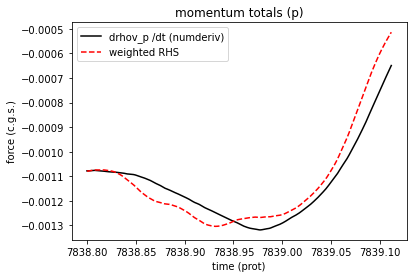

In [22]:
# plot phi momentum (totals)
plt.plot(t[2:], drhovdt_p[:, iphi0, it0, ir0], 'k', label='drhov_p /dt (numderiv)')
plt.plot(t[2:], fweighted_p[:, iphi0, it0, ir0], 'r--', label='weighted RHS')

# label
plt.legend()
plt.xlabel('time (prot)')
plt.ylabel('force (c.g.s.)')
plt.title('momentum totals (p)')

Text(0.5, 1.0, 'heat eq.')

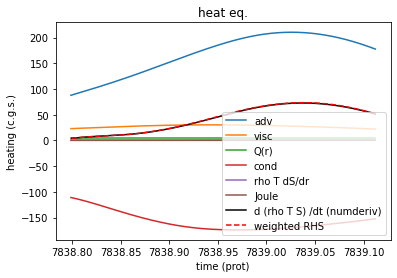

In [23]:
# plot heat equation (all pieces)

# pieces
plt.plot(t, adv_heat[:, iphi0, it0, ir0], label='adv')
plt.plot(t, visc_heat[:, iphi0, it0, ir0], label='visc')
plt.plot(t, int_heat[:, iphi0, it0, ir0], label='Q(r)')
plt.plot(t, cond_heat[:, iphi0, it0, ir0], label='cond')
plt.plot(t, ref_adv_heat[:, iphi0, it0, ir0], label='rho T dS/dr')
plt.plot(t, joule_heat[:, iphi0, it0, ir0], label='Joule')

# totals
plt.plot(t[2:], dintedt[:, iphi0, it0, ir0], 'k', label='d (rho T S) /dt (numderiv)')
plt.plot(t[2:], fweighted_heat[:, iphi0, it0, ir0], 'r--', label='weighted RHS')

# label
plt.legend()
plt.xlabel('time (prot)')
plt.ylabel('heating (c.g.s.)')
plt.title('heat eq.')

Text(0.5, 1.0, 'heat eq. totals')

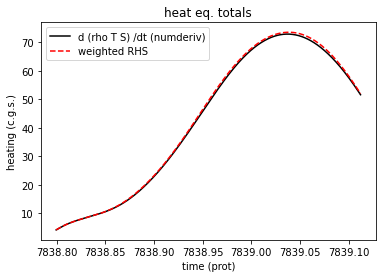

In [24]:
# plot heat equation (all pieces)

# totals
plt.plot(t[2:], dintedt[:, iphi0, it0, ir0], 'k', label='d (rho T S) /dt (numderiv)')
plt.plot(t[2:], fweighted_heat[:, iphi0, it0, ir0], 'r--', label='weighted RHS')

# label
plt.legend()
plt.xlabel('time (prot)')
plt.ylabel('heating (c.g.s.)')
plt.title('heat eq. totals')

In [25]:
# quantify the numerical errors
def get_err(diff, norm, point=None, ir=None):
    if not point is None:
        diff = diff[:, point[0], point[1], point[2]]
        norm = norm[:, point[0], point[1], point[2]]
    if not ir is None:
        diff = diff[..., ir]
        norm = norm[..., ir]
        
    denom = norm**2
    for i in range(norm.ndim - 1):
        denom = np.mean(denom, axis=-1)
    denom = np.sqrt(np.mean(denom))
    
    numer = diff**2
    for i in range(norm.ndim - 1):
        numer = np.mean(numer, axis=-1)
    numer = np.sqrt(np.mean(numer))
    return rms(numer/denom)

In [26]:
# stringent error, at the point we plotted
print ("err mom r = ", get_err(fweighted_r - drhovdt_r, fweighted_r, point=(iphi0, it0, ir0)))
print ("err mom t = ", get_err(fweighted_t - drhovdt_t, fweighted_t, point=(iphi0, it0, ir0)))
print ("err mom p = ", get_err(fweighted_p - drhovdt_p, fweighted_p, point=(iphi0, it0, ir0)))
print ("err heat  = ", get_err(fweighted_heat - dintedt, fweighted_heat, point=(iphi0, it0, ir0)))

err mom r =  0.06357406918186428
err mom t =  0.013866883601894852
err mom p =  0.05861712252797398
err heat  =  0.010596922455628018


In [27]:
# errors (w.r.t. maxabs) at the point we plotted
print ("err mom r = ", get_err(fweighted_r - drhovdt_r, maxabs_r[2:], point=(iphi0, it0, ir0)))
print ("err mom t = ", get_err(fweighted_t - drhovdt_t, maxabs_t[2:], point=(iphi0, it0, ir0)))
print ("err mom p = ", get_err(fweighted_p - drhovdt_p, maxabs_p[2:], point=(iphi0, it0, ir0)))
print ("err heat  = ", get_err(fweighted_heat - dintedt, maxabs_heat[2:], point=(iphi0, it0, ir0)))

err mom r =  0.005694698019870418
err mom t =  0.0053276688148369425
err mom p =  0.005292105845383953
err heat  =  0.0030327384602990594


In [28]:
# stringent errors
print ("err mom r = ", get_err(fweighted_r - drhovdt_r, fweighted_r))
print ("err mom t = ", get_err(fweighted_t - drhovdt_t, fweighted_t))
print ("err mom p = ", get_err(fweighted_p - drhovdt_p, fweighted_p))
print ("err heat  = ", get_err(fweighted_heat - dintedt, fweighted_heat))

err mom r =  0.99899973866948
err mom t =  0.7045663834238959
err mom p =  0.6576134039649051
err heat  =  0.019426828828491227


In [29]:
# errors (w.r.t. maxabs)
print ("err mom r = ", get_err(fweighted_r - drhovdt_r, maxabs_r[2:]))
print ("err mom t = ", get_err(fweighted_t - drhovdt_t, maxabs_t[2:]))
print ("err mom p = ", get_err(fweighted_p - drhovdt_p, maxabs_p[2:]))
print ("err heat  = ", get_err(fweighted_heat - dintedt, maxabs_heat[2:]))

err mom r =  0.16911911145478534
err mom t =  0.1464211162309765
err mom p =  0.10767830837311665
err heat  =  0.01595776478656172


In [30]:
# print error at each radius
print ('mom (r) errors at different radii')
for ir in range(len(irvals)):
    print ('ir = %i:' %ir, 'err = ', get_err(fweighted_r - drhovdt_r, fweighted_r, ir=ir))

mom (r) errors at different radii
ir = 0: err =  0.07496003458505326
ir = 1: err =  0.04594922481383075
ir = 2: err =  0.02196465317075332
ir = 3: err =  0.026056733883176746
ir = 4: err =  0.08109727037897757
ir = 5: err =  0.02643110375252513
ir = 6: err =  0.04435806207492084
ir = 7: err =  0.12265951239597565
ir = 8: err =  0.38595459685193395
ir = 9: err =  1.000751388597166
ir = 10: err =  0.006604942829329377
ir = 11: err =  0.0008658316622483639
ir = 12: err =  0.00015551837539238726
ir = 13: err =  5.9433717713853936e-05
ir = 14: err =  2.7731391923103315e-05
ir = 15: err =  2.56083268055325e-05
ir = 16: err =  5.3301907227023225e-05
ir = 17: err =  0.00012936345132649773
ir = 18: err =  0.0002910866127822668


In [31]:
# print error at each radius
print ('mom (t) errors at different radii')
for ir in range(len(irvals)):
    print ('ir = %i:' %ir, 'err = ', get_err(fweighted_t - drhovdt_t, fweighted_t, ir=ir))

mom (t) errors at different radii
ir = 0: err =  0.09504182085976352
ir = 1: err =  0.0761640053358425
ir = 2: err =  0.053291000929092884
ir = 3: err =  0.05161477630397459
ir = 4: err =  0.06879633397601241
ir = 5: err =  0.04241211649066467
ir = 6: err =  0.0306690896668774
ir = 7: err =  0.017966414056697744
ir = 8: err =  0.021725071394156015
ir = 9: err =  0.9594041610796686
ir = 10: err =  0.0006077728105240773
ir = 11: err =  0.000544096908271814
ir = 12: err =  0.00033267703663951556
ir = 13: err =  0.00011336570528358067
ir = 14: err =  4.90852288365331e-05
ir = 15: err =  2.4730524038850273e-05
ir = 16: err =  4.227247705441336e-05
ir = 17: err =  6.015944545005116e-05
ir = 18: err =  6.036419213640828e-05


In [32]:
# print error at each radius
print ('mom (p) errors at different radii')
for ir in range(len(irvals)):
    print ('ir = %i:' %ir, 'err = ', get_err(fweighted_p - drhovdt_p, fweighted_p, ir=ir))

mom (p) errors at different radii
ir = 0: err =  0.10986673423121301
ir = 1: err =  0.12316051126651552
ir = 2: err =  0.10590614967188913
ir = 3: err =  0.11027769273441515
ir = 4: err =  0.47722044466875535
ir = 5: err =  0.11238404084228691
ir = 6: err =  0.09992332445368442
ir = 7: err =  0.04552045512519743
ir = 8: err =  0.0392565821710297
ir = 9: err =  0.9525037851747007
ir = 10: err =  0.0013958699654126653
ir = 11: err =  0.0012916963692773441
ir = 12: err =  0.0005661257252347949
ir = 13: err =  0.00020157933984478598
ir = 14: err =  9.491505051450195e-05
ir = 15: err =  2.9738949765539577e-05
ir = 16: err =  2.1333526013413678e-05
ir = 17: err =  2.5340386211448772e-05
ir = 18: err =  2.7370003105673413e-05


In [33]:
# print error at each radius
print ('heat errors at different radii')
for ir in range(len(irvals)):
    print ('ir = %i:' %ir, 'err = ', get_err(fweighted_heat - dintedt, fweighted_heat, ir=ir))

heat errors at different radii
ir = 0: err =  0.010549686420185968
ir = 1: err =  0.007457900116971183
ir = 2: err =  0.003714481088324404
ir = 3: err =  0.002820438901486838
ir = 4: err =  0.013739307223730264
ir = 5: err =  0.0013442737553716125
ir = 6: err =  0.002851899047353061
ir = 7: err =  0.006422117034846235
ir = 8: err =  0.004125582507366468
ir = 9: err =  0.226703085366755
ir = 10: err =  0.00020461001908384687
ir = 11: err =  0.00014636439505087446
ir = 12: err =  4.46233252797671e-05
ir = 13: err =  3.362142298355557e-05
ir = 14: err =  1.8765269147471248e-05
ir = 15: err =  9.499992187387376e-06
ir = 16: err =  5.54800082682555e-06
ir = 17: err =  4.989801509174517e-06
ir = 18: err =  3.909790017947282e-06
